Пункт А:
Так как каждое окошко принимает не больше двух людей, то если окошек $N$, то людей не больше $2N$

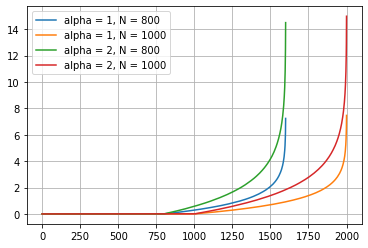

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import statistics


fig, ax = plt.subplots()


def plot(N, alpha):
    xs = np.linspace(1, 2 * N, 2 * N)
    
    def my_mean(*args):
        return statistics.mean(args)
    
    ys = [0] * N + list(map(my_mean, *map(lambda _: sorted(np.random.exponential(alpha, N)), [None] * N)))
    
    plt.plot(xs, ys, label=f'alpha = {alpha}, N = {N}')
    
plot(800, 1)
plot(1000, 1)
plot(800, 2)
plot(1000, 2)

plt.grid()
plt.legend()
plt.show()

Так как первые $N$ людей сразу же обслуживаются, то для них время ожидания равно 0. А для остальных $N$ среднее время ожидания равно среднему значению $k$-й порядковой статистики (так как это она и есть)

Пункт Б:
$N$ окошек, $K$ людей

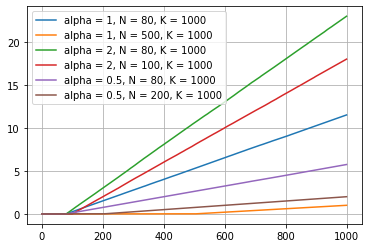

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import statistics
from sortedcontainers import SortedList


fig, ax = plt.subplots()


def plot(N, K, alpha):
    xs = np.linspace(1, K, K)
    
    def gen_ys():
        ys = []

        l = SortedList()
        l.update([0] * N)

        for _ in range(K):
            minimum = l[0]
            ys.append(minimum)
            l.remove(minimum)
            l.update([minimum + np.random.exponential(alpha, 1)[0]])
        return ys
    
    def my_mean(*args):
        return statistics.mean(args)
    
    ys = list(map(my_mean, *map(lambda _: gen_ys(), [None] * N)))
        
    
    plt.plot(xs, ys, label=f'alpha = {alpha}, N = {N}, K = {K}')
    
plot(80, 1000, 1)
plot(500, 1000, 1)
plot(80, 1000, 2)
plot(100, 1000, 2)
plot(80, 1000, 0.5)
plot(200, 1000, 0.5)

plt.grid()
plt.legend()
plt.show()

Если окна работают бесконечно, то среднее время ожидания растет линейно (после точки $N$, до которой константный 0)